In [1]:
import lightkurve as lk
%matplotlib inline

In [3]:
tpf=lk.search_targetpixelfile('SV Cam')
tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 19,2019,SPOC,120,397184624,0.0
1,TESS Sector 20,2019,SPOC,120,397184624,0.0
2,TESS Sector 40,2021,SPOC,120,397184624,0.0
3,TESS Sector 47,2021,SPOC,120,397184624,0.0
4,TESS Sector 52,2022,SPOC,120,397184624,0.0
5,TESS Sector 59,2022,SPOC,120,397184624,0.0
6,TESS Sector 60,2022,SPOC,120,397184624,0.0
7,TESS Sector 19,2019,TESS-SPOC,1800,397184624,0.0
8,TESS Sector 20,2019,TESS-SPOC,1800,397184624,0.0


In [4]:
tpf = tpf[6].download()

In [5]:
tpf.animate()

In [6]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

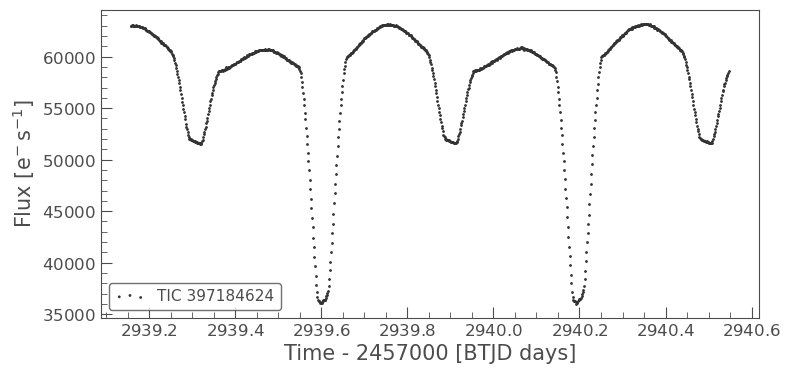

In [9]:
lcp=lc[1500:2500]
lcp.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

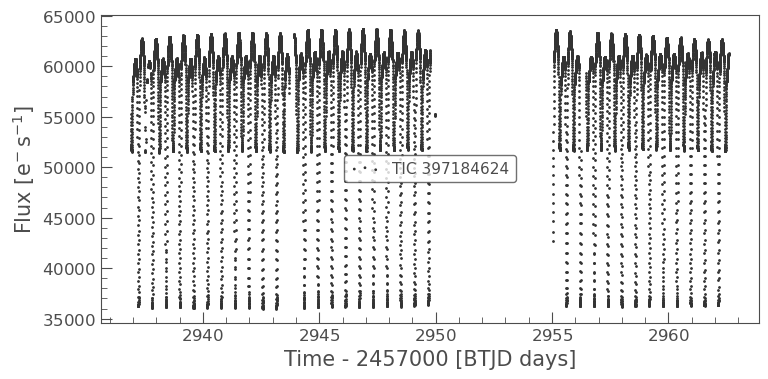

In [10]:
lc.scatter()

In [31]:
pg = lc.to_periodogram(method="ls",minimum_period=0.1,maximum_period=2,oversample_factor=100)

In [11]:
pg = lc.to_periodogram(method="ls",minimum_period=0.1,maximum_period=2,oversample_factor=100)

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

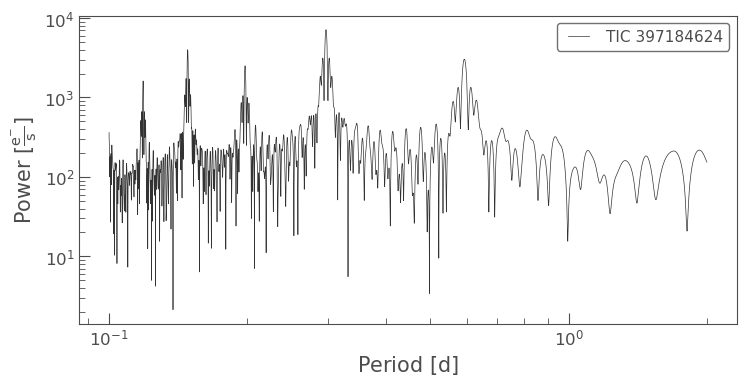

In [12]:
pg.plot(view="period",scale="log")

In [13]:
pg.period_at_max_power

<Quantity 0.2965591 d>

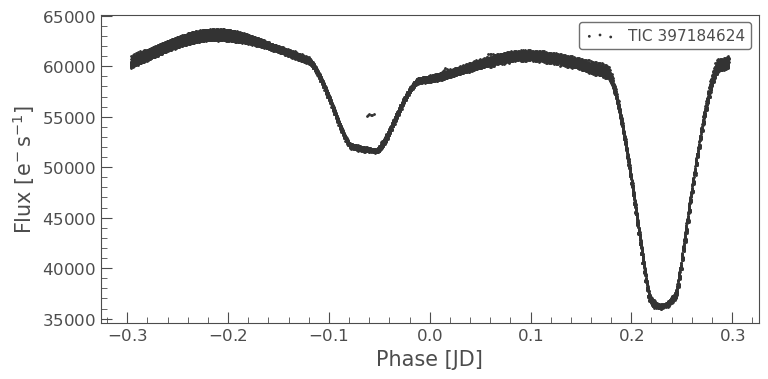

In [17]:
lc.fold(period=pg.period_at_max_power*2,epoch_phase=0.5).scatter();